# Подключение google disk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Установка модели

In [2]:
%%capture
# Установка SwinIR
!git clone https://github.com/JingyunLiang/SwinIR.git
%cd SwinIR
!pip install timm
!pip install opencv-python
%cd ..

# Загрузка предобученной модели (x4)
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth -P SwinIR/model_zoo

# Импорт библиотек

In [6]:
# Подготовка папок
import os
from google.colab import files
import shutil
from IPython.display import Image, display
import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Функции загрузки изображений, их обработки и общая функция

In [4]:
def apply_model() -> None:
    subprocess.run([
        "python",
        "SwinIR/main_test_swinir.py",
        "--task", "real_sr",
        "--model_path", "SwinIR/model_zoo/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth",
        "--folder_lq", "preimprove_images",
        "--scale", "4",
        "--tile", "300"
    ], check=True)

In [5]:
def upload__and_improve_images(hero: str, dataset_path: str) -> None:
    upload_folder = "preimprove_images"
    result_folder = f"results"

    shutil.rmtree(upload_folder, ignore_errors=True)
    shutil.rmtree(result_folder, ignore_errors=True)
    os.makedirs(upload_folder, exist_ok=True)
    os.makedirs(result_folder, exist_ok=True)

    path = f"{dataset_path}{hero}/"
    total = len(os.listdir(path))
    for filename, i in zip(os.listdir(path), range(total)):
        shutil.copy(path + filename, os.path.join(upload_folder, filename))

        successfully = "Yes"
        try:
            apply_model()
        except:
            successfully = "No"

        os.remove(f"{upload_folder}/{filename}")

        print(f"{hero}: {i + 1} / {total} ||| {successfully}")

In [6]:
def calc() -> None:
    dataset_path = "./drive/MyDrive/parse_dataset/"
    results_path = "./results/swinir_real_sr_x4/"

    # heroes = ["Йоруичи Шихоин", "Ичиго Куросаки", "Кенпачи Зараки", "Кисуке Урахара", "Сосуке Айзен"]
    heroes = ["Ичиго Куросаки", "Кенпачи Зараки", "Кисуке Урахара", "Сосуке Айзен"]

    for hero in heroes:
        upload__and_improve_images(hero, dataset_path)

        for filename in os.listdir(results_path):
            shutil.copy(results_path + filename, f"{dataset_path}improve/{hero}/")

# Применение и визуализация

In [7]:
calc()

Ичиго Куросаки: 1 / 358 ||| Yes
Ичиго Куросаки: 2 / 358 ||| Yes
Ичиго Куросаки: 3 / 358 ||| Yes
Ичиго Куросаки: 4 / 358 ||| Yes
Ичиго Куросаки: 5 / 358 ||| Yes
Ичиго Куросаки: 6 / 358 ||| Yes
Ичиго Куросаки: 7 / 358 ||| Yes
Ичиго Куросаки: 8 / 358 ||| Yes
Ичиго Куросаки: 9 / 358 ||| Yes
Ичиго Куросаки: 10 / 358 ||| Yes
Ичиго Куросаки: 11 / 358 ||| Yes
Ичиго Куросаки: 12 / 358 ||| Yes
Ичиго Куросаки: 13 / 358 ||| Yes
Ичиго Куросаки: 14 / 358 ||| Yes
Ичиго Куросаки: 15 / 358 ||| Yes
Ичиго Куросаки: 16 / 358 ||| Yes
Ичиго Куросаки: 17 / 358 ||| Yes
Ичиго Куросаки: 18 / 358 ||| Yes
Ичиго Куросаки: 19 / 358 ||| Yes
Ичиго Куросаки: 20 / 358 ||| Yes
Ичиго Куросаки: 21 / 358 ||| Yes
Ичиго Куросаки: 22 / 358 ||| Yes
Ичиго Куросаки: 23 / 358 ||| Yes
Ичиго Куросаки: 24 / 358 ||| Yes
Ичиго Куросаки: 25 / 358 ||| Yes
Ичиго Куросаки: 26 / 358 ||| Yes
Ичиго Куросаки: 27 / 358 ||| Yes
Ичиго Куросаки: 28 / 358 ||| Yes
Ичиго Куросаки: 29 / 358 ||| Yes
Ичиго Куросаки: 30 / 358 ||| Yes
Ичиго Куросаки: 31 

In [9]:
def show_diff(img: str, improve_img: str) -> None:
    img1 = mpimg.imread(img)
    img2 = mpimg.imread(improve_img)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img1)
    axes[0].axis("off")
    axes[0].set_title("Начальное изображение")

    axes[1].imshow(img2)
    axes[1].axis("off")
    axes[1].set_title("Улучшенное изображение")

    plt.tight_layout()
    plt.show()

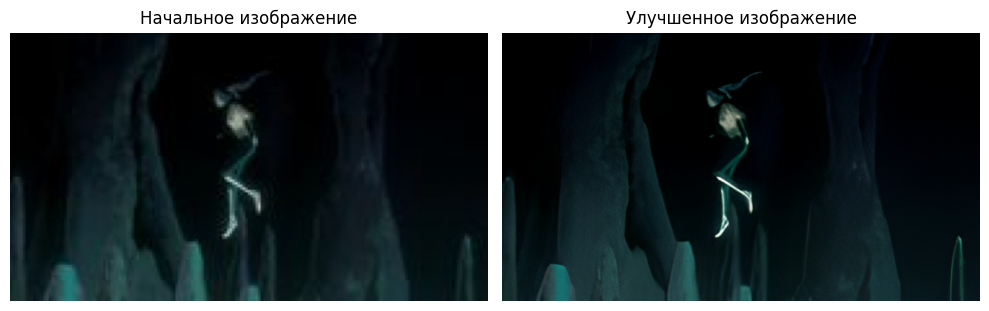

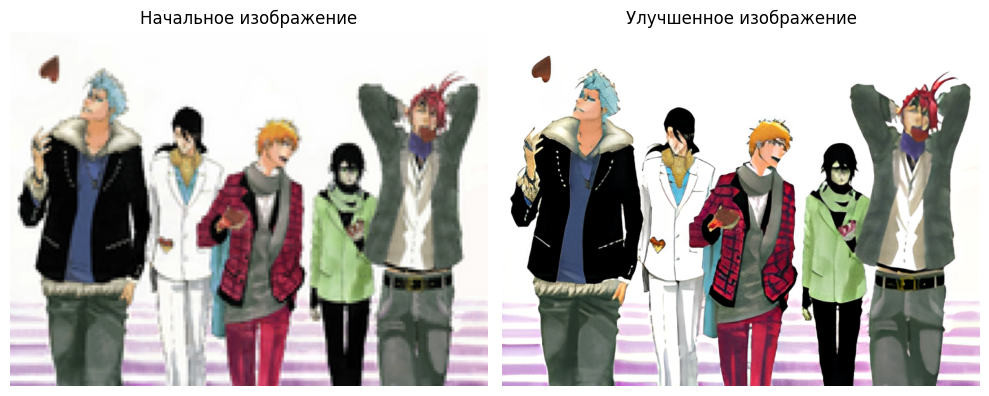

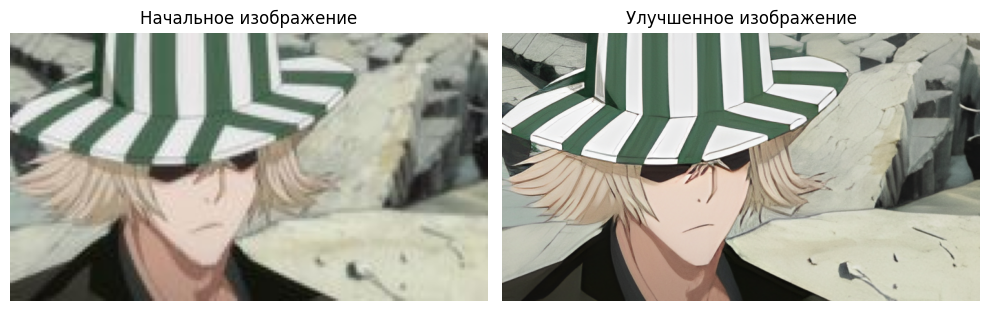

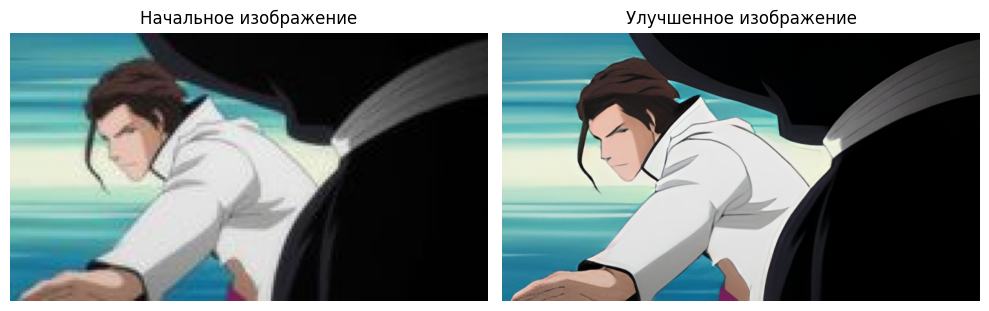

In [11]:
size = 4

imgs = ["./drive/MyDrive/parse_dataset/Йоруичи Шихоин/109.jpg", "./drive/MyDrive/parse_dataset/Ичиго Куросаки/110.jpg", "./drive/MyDrive/parse_dataset/Кисуке Урахара/109.jpg", "./drive/MyDrive/parse_dataset/Сосуке Айзен/110.jpg"]
improve_imgs = ["./drive/MyDrive/parse_dataset/improve/Йоруичи Шихоин/109_SwinIR.png", "./drive/MyDrive/parse_dataset/improve/Ичиго Куросаки/110_SwinIR.png", "./drive/MyDrive/parse_dataset/improve/Кисуке Урахара/109_SwinIR.png", "./drive/MyDrive/parse_dataset/improve/Сосуке Айзен/110_SwinIR.png"]

for i in range(size):
    show_diff(imgs[i], improve_imgs[i])